In [5]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import numpy as np


In [7]:
path_4x4 = "/content/drive/MyDrive/dataset/puzzle_4x4/*.jpg"

images_4x4 = sorted(glob.glob(path_4x4))

print("4x4 files:", len(images_4x4))

4x4 files: 110


In [10]:
def extract_tiles_from_image(image, grid_size=(4, 4)):
    """Extract tiles from one image based on the specified grid size"""
    height, width = image.shape[:2]
    rows, cols = grid_size

    piece_height = height // rows
    piece_width = width // cols

    tiles = []

    for row in range(rows):
        for col in range(cols):
            y1 = row * piece_height
            y2 = (row + 1) * piece_height
            x1 = col * piece_width
            x2 = (col + 1) * piece_width

            tile = image[y1:y2, x1:x2].copy()

            tiles.append({
                'tile': tile,
                'position': (row, col),
                'image_idx': 0  # Will be updated in loop
            })

    return tiles


In [11]:
all_tiles = []

for img_idx, img_path in enumerate(images_4x4):
    img = cv2.imread(img_path)
    tiles = extract_tiles_from_image(img, grid_size=(4, 4))

    # Update image index
    for tile_data in tiles:
        tile_data['image_idx'] = img_idx

    all_tiles.extend(tiles)


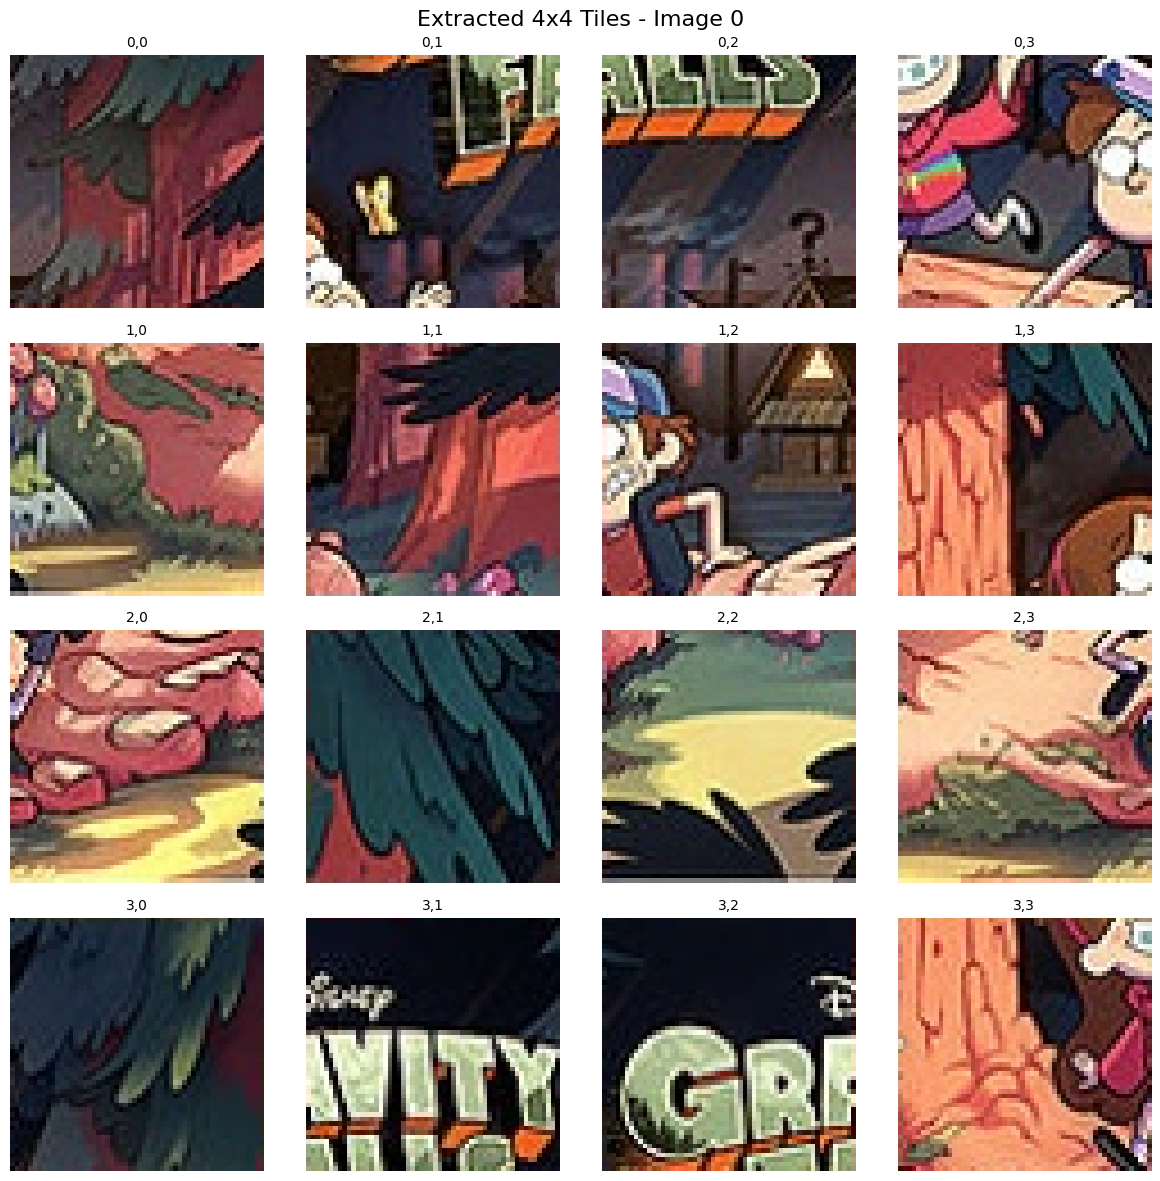

In [12]:
# Pick the first image (image_idx = 0)
sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:  # 16 tiles for 4x4
    row, col = tile_data['position']
    tile = tile_data['tile']

    axes[row, col].imshow(cv2.cvtColor(tile, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Extracted 4x4 Tiles - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


Step 1: Converting all tiles to grayscale...
✓ Converted 1760 tiles to grayscale


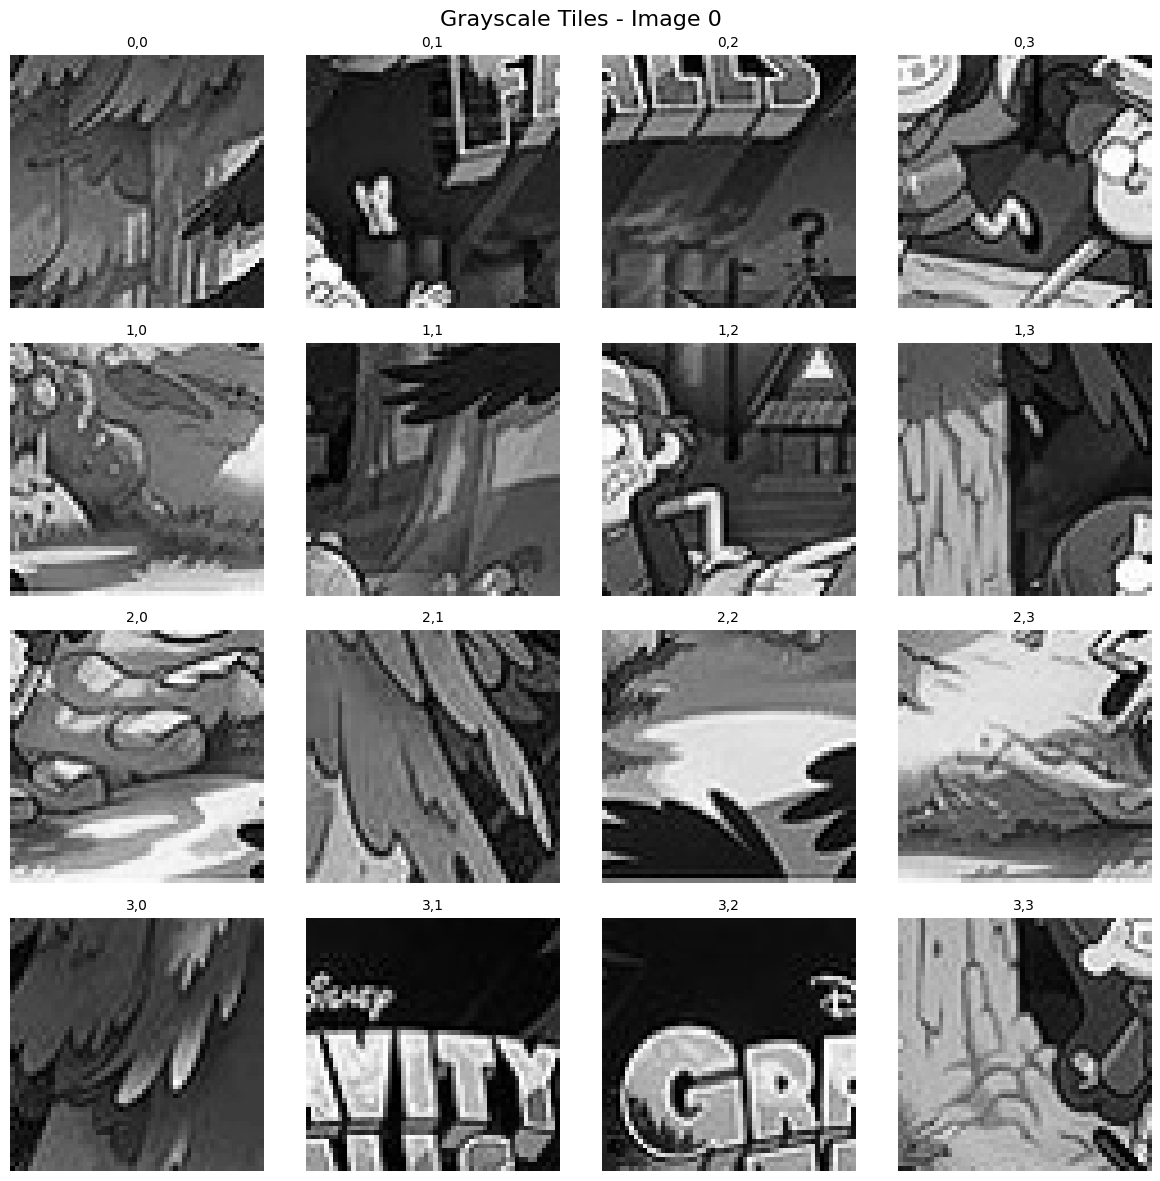

In [13]:
# ==========================================
# STEP 1: GRAYSCALE CONVERSION (4x4)
# ==========================================

print("Step 1: Converting all tiles to grayscale...")

for tile_data in all_tiles:
    tile = tile_data['tile']

    # Convert to grayscale
    if len(tile.shape) == 3:
        gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
    else:
        gray = tile.copy()

    # Store in tile_data
    tile_data['gray'] = gray

print(f"✓ Converted {len(all_tiles)} tiles to grayscale")

# ==========================================
# VISUALIZE: SAMPLE GRAYSCALE TILES (first image)
# ==========================================

sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:
    row, col = tile_data['position']
    gray = tile_data['gray']

    axes[row, col].imshow(gray, cmap='gray')
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Grayscale Tiles - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


Step 2: Applying Gaussian blur to all tiles...
✓ Applied Gaussian blur to 1760 tiles


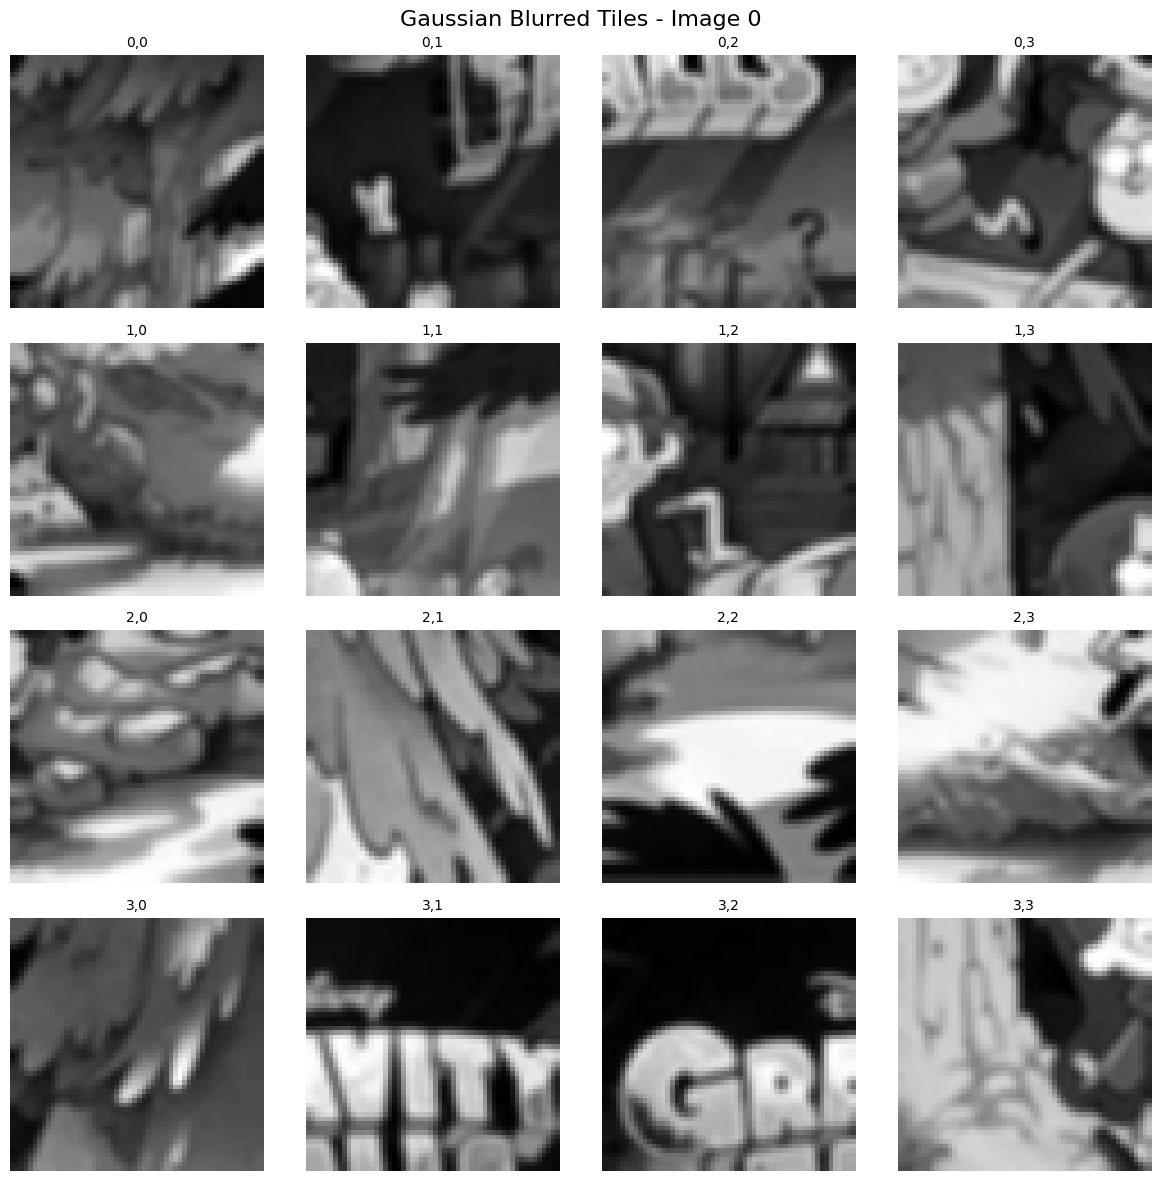

In [14]:
# ==========================================
# STEP 2: GAUSSIAN BLUR
# ==========================================

print("Step 2: Applying Gaussian blur to all tiles...")

kernel_size = (5, 5)

for tile_data in all_tiles:
    gray = tile_data['gray']

    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(gray, kernel_size, 0)

    # Store in tile_data
    tile_data['blurred'] = blurred

print(f"✓ Applied Gaussian blur to {len(all_tiles)} tiles")

# ==========================================
# VISUALIZE: SAMPLE BLURRED TILES (first image)
# ==========================================

sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:
    row, col = tile_data['position']
    blurred = tile_data['blurred']

    axes[row, col].imshow(blurred, cmap='gray')
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Gaussian Blurred Tiles - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


Step 3: Applying Canny edge detection to all tiles...
✓ Applied Canny to 1760 tiles


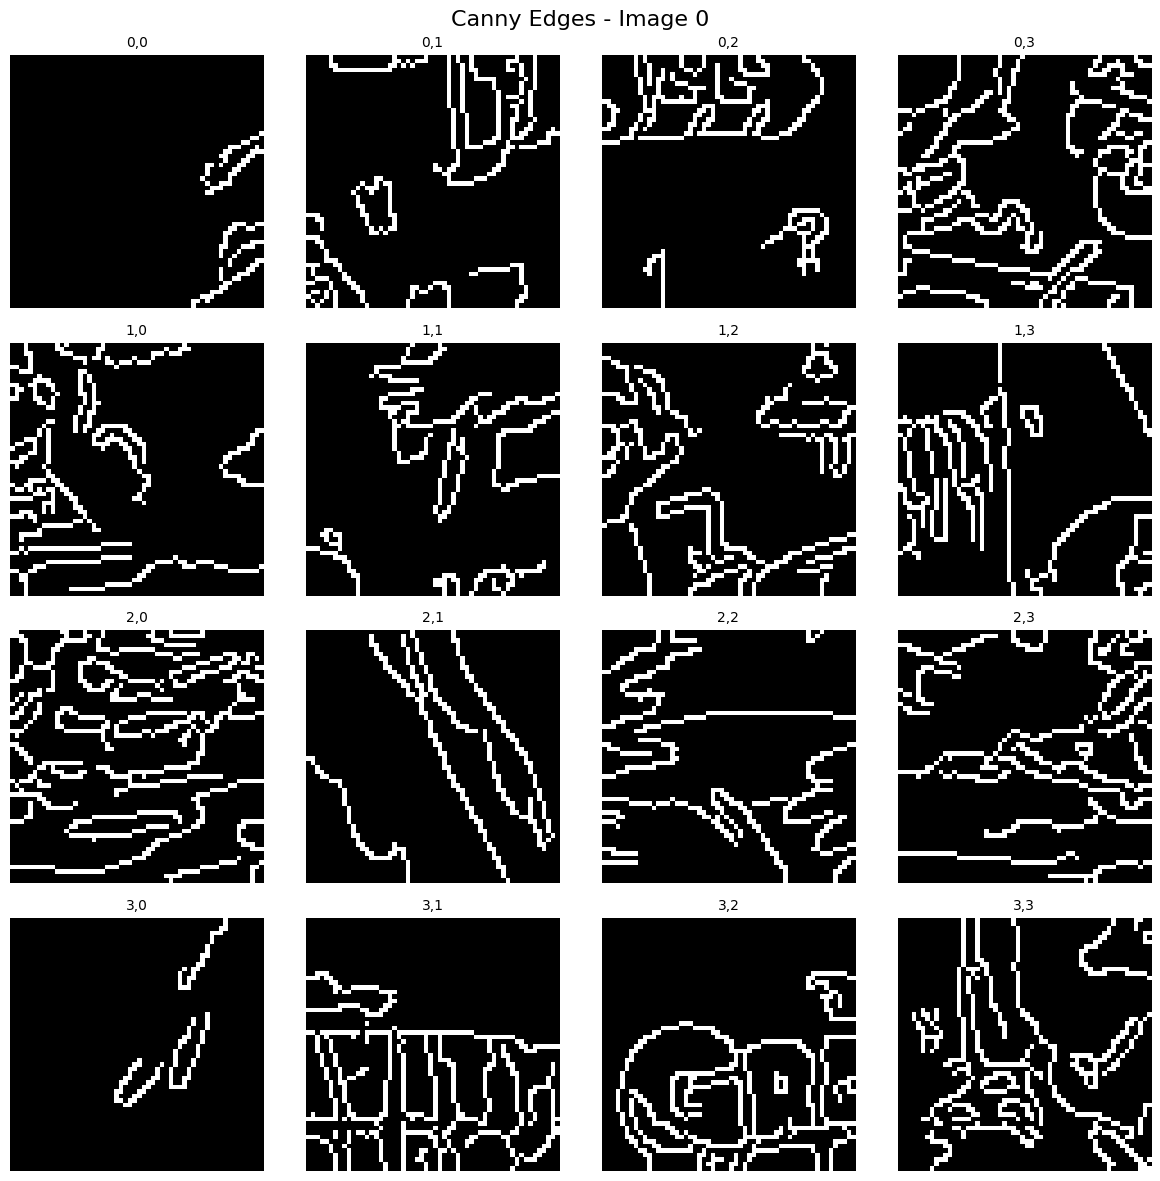

In [15]:
# ==========================================
# STEP 3: CANNY EDGE DETECTION
# ==========================================

print("Step 3: Applying Canny edge detection to all tiles...")

for tile_data in all_tiles:
    blurred = tile_data['blurred']

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 70, 200)  # thresholds can be tuned

    # Store edges in tile_data
    tile_data['edges'] = edges

print(f"✓ Applied Canny to {len(all_tiles)} tiles")

# ==========================================
# VISUALIZE: SAMPLE CANNY EDGES (first image)
# ==========================================

sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:
    row, col = tile_data['position']
    edges = tile_data['edges']

    axes[row, col].imshow(edges, cmap='gray')
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Canny Edges - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


Step 4: Applying morphological closing to all tiles...
✓ Applied morphological closing to 1760 tiles


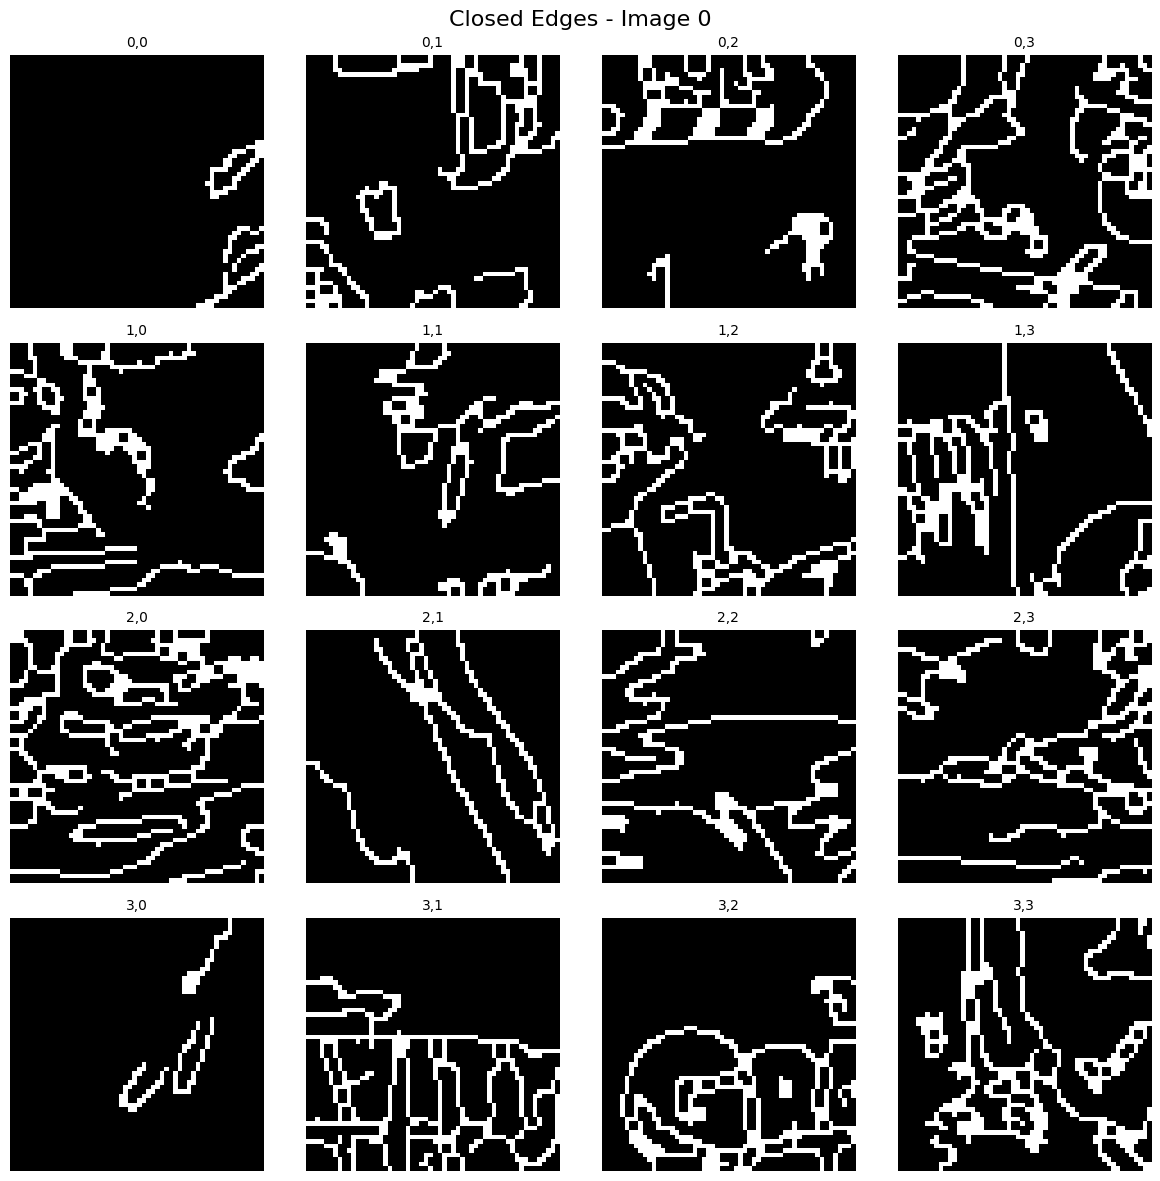

In [19]:
# ==========================================
# STEP 4: MORPHOLOGICAL CLOSING
# ==========================================

print("Step 4: Applying morphological closing to all tiles...")

# Use a small kernel for tiny 4x4 tiles
kernel = np.ones((2, 2), np.uint8)
for tile_data in all_tiles:
    edges = tile_data['edges']  # get Canny edges

    # Apply morphological closing (dilate then erode)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Store in tile_data
    tile_data['edges_closed'] = closed_edges

print(f"✓ Applied morphological closing to {len(all_tiles)} tiles")

# ==========================================
# VISUALIZE: SAMPLE CLOSED EDGES (first image)
# ==========================================

sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:
    row, col = tile_data['position']
    closed_edges = tile_data['edges_closed']

    axes[row, col].imshow(closed_edges, cmap='gray')
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Closed Edges - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


Step 5: Extracting contours from all tiles...
✓ Extracted contours for 1760 tiles


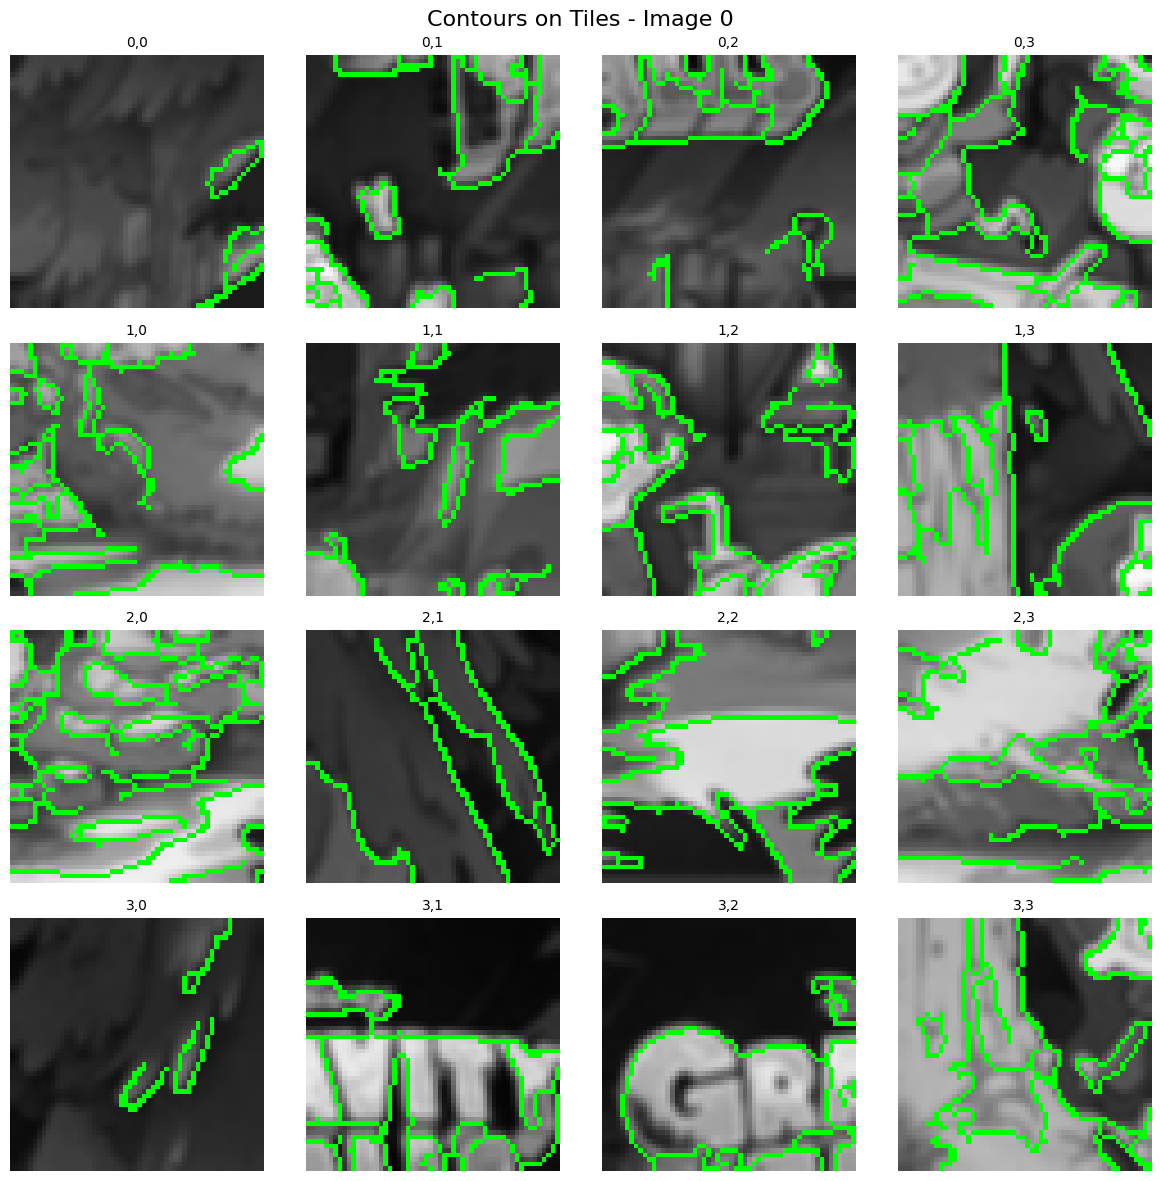

In [20]:
# ==========================================
# STEP 5: CONTOUR EXTRACTION AND VISUALIZATION
# ==========================================

print("Step 5: Extracting contours from all tiles...")

all_contours = []

for tile_data in all_tiles:
    closed_edges = tile_data['edges_closed']

    # Find contours
    contours, hierarchy = cv2.findContours(
        closed_edges.copy(),
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )

    # Store contours in tile_data
    tile_data['contours'] = contours
    all_contours.append(contours)

print(f"✓ Extracted contours for {len(all_tiles)} tiles")

# ==========================================
# VISUALIZE: SAMPLE CONTOURS ON TILES (first image)
# ==========================================

sample_tiles = [t for t in all_tiles if t['image_idx'] == 0]

fig, axes = plt.subplots(4, 4, figsize=(12, 12))

for tile_data in sample_tiles[:16]:
    row, col = tile_data['position']
    contours = tile_data['contours']

    # Draw contours on the blurred image
    tile_rgb = cv2.cvtColor(tile_data['blurred'], cv2.COLOR_GRAY2BGR)
    cv2.drawContours(tile_rgb, contours, -1, (0, 255, 0), 1)

    axes[row, col].imshow(cv2.cvtColor(tile_rgb, cv2.COLOR_BGR2RGB))
    axes[row, col].set_title(f'{row},{col}', fontsize=10)
    axes[row, col].axis('off')

plt.suptitle('Contours on Tiles - Image 0', fontsize=16)
plt.tight_layout()
plt.show()


In [21]:
def visualize_image_tiles_with_contours_4x4(image_index, all_tiles, tiles_per_row=4):
    # Get the 16 tiles for this image
    start_idx = image_index * 16
    end_idx = start_idx + 16
    tiles = all_tiles[start_idx:end_idx]

    # Determine tile size (assuming all tiles same size)
    h, w = tiles[0]['blurred'].shape

    # Create an empty canvas for the whole image
    canvas = np.zeros((h * tiles_per_row, w * tiles_per_row, 3), dtype=np.uint8)

    for idx, tile_data in enumerate(tiles):
        closed_edges = tile_data['edges_closed']
        original = tile_data['blurred']

        # Draw contours on original tile (convert to BGR)
        tile_rgb = cv2.cvtColor(original, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(tile_rgb, tile_data['contours'], -1, (0, 255, 0), 1)

        # Compute position in canvas
        row = idx // tiles_per_row
        col = idx % tiles_per_row
        canvas[row*h:(row+1)*h, col*w:(col+1)*w] = tile_rgb

    # Display
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {image_index+1} - Contours on All 16 Tiles')
    plt.axis('off')
    plt.show()


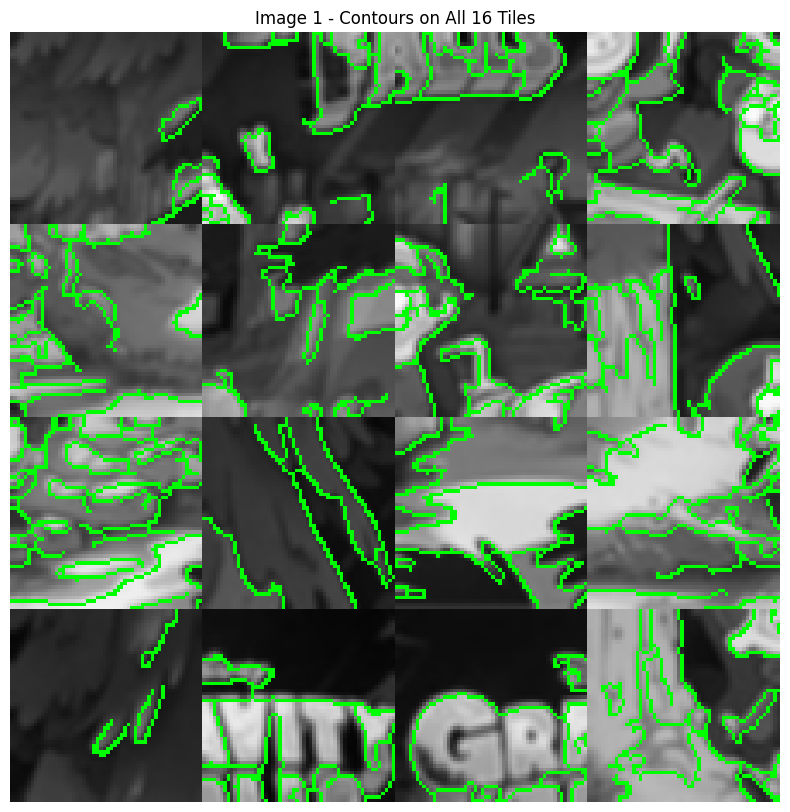

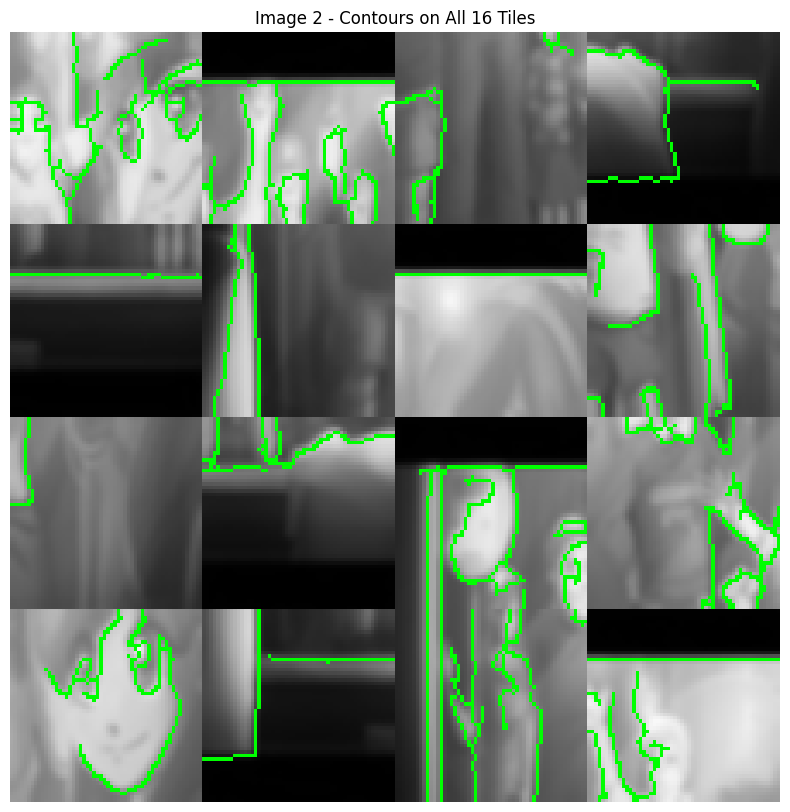

In [22]:
visualize_image_tiles_with_contours_4x4(0, all_tiles)  # first image
visualize_image_tiles_with_contours_4x4(1, all_tiles)  # second image


In [27]:
def save_pipeline_steps_4x4(all_tiles, output_base_path="/content/drive/MyDrive/image_processing/milestone1/results_4x4", tiles_per_image=16, tiles_per_row=4, save_tiles=True):
    """
    Save stitched images for all processing steps of 4x4 tiles.
    Steps: grayscale, blurred, edges (Canny/Laplacian), morphology, contours
    """
    steps = ['gray', 'blurred', 'edges', 'edges_closed', 'contours_overlay']
    num_images = len(all_tiles) // tiles_per_image

    # Create base output folders
    for step in steps:
        os.makedirs(os.path.join(output_base_path, step), exist_ok=True)

    for img_idx in range(num_images):
        start_idx = img_idx * tiles_per_image
        end_idx = start_idx + tiles_per_image
        tiles = all_tiles[start_idx:end_idx]

        # Precompute contour overlays
        for tile_data in tiles:
            if 'contours' in tile_data:
                overlay = cv2.cvtColor(tile_data['blurred'], cv2.COLOR_GRAY2BGR)
                cv2.drawContours(overlay, tile_data['contours'], -1, (0,255,0), 1)
                tile_data['contours_overlay'] = overlay

        for step in steps:
            h, w = tiles[0][step].shape[:2] if step != 'contours_overlay' else tiles[0][step].shape[:2]
            canvas = np.zeros((h * tiles_per_row, w * tiles_per_row, 3), dtype=np.uint8) if step == 'contours_overlay' else np.zeros((h * tiles_per_row, w * tiles_per_row), dtype=np.uint8)

            for idx, tile_data in enumerate(tiles):
                tile_img = tile_data[step]
                if step == 'contours_overlay' and len(tile_img.shape) == 2:
                    tile_img = cv2.cvtColor(tile_img, cv2.COLOR_GRAY2BGR)

                row = idx // tiles_per_row
                col = idx % tiles_per_row
                canvas[row*h:(row+1)*h, col*w:(col+1)*w] = tile_img

                if save_tiles:
                    tile_file = os.path.join(output_base_path, step, f"image{img_idx+1}_tile{idx+1:02d}.png")
                    cv2.imwrite(tile_file, tile_img)

            # Save stitched image
            stitched_file = os.path.join(output_base_path, step, f"image{img_idx+1}_stitched.png")
            cv2.imwrite(stitched_file, canvas)

        print(f"Saved all steps for image {img_idx+1}")

    print(f"✓ All 4x4 pipeline results saved at: {output_base_path}")


In [28]:
save_pipeline_steps_4x4(all_tiles)


Saved all steps for image 1
Saved all steps for image 2
Saved all steps for image 3
Saved all steps for image 4
Saved all steps for image 5
Saved all steps for image 6
Saved all steps for image 7
Saved all steps for image 8
Saved all steps for image 9
Saved all steps for image 10
Saved all steps for image 11
Saved all steps for image 12
Saved all steps for image 13
Saved all steps for image 14
Saved all steps for image 15
Saved all steps for image 16
Saved all steps for image 17
Saved all steps for image 18
Saved all steps for image 19
Saved all steps for image 20
Saved all steps for image 21
Saved all steps for image 22
Saved all steps for image 23
Saved all steps for image 24
Saved all steps for image 25
Saved all steps for image 26
Saved all steps for image 27
Saved all steps for image 28
Saved all steps for image 29
Saved all steps for image 30
Saved all steps for image 31
Saved all steps for image 32
Saved all steps for image 33
Saved all steps for image 34
Saved all steps for ima